In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\prath\OneDrive\Desktop\excel\Customer_Conversion_Prediction.csv')
print(df.shape)
df

(45211, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


## Data Cleaning

### age

In [4]:
df.age.values[0]

58

In [5]:
df.age.dtypes

dtype('int64')

In [6]:
df.age.isnull().sum()

0

In [7]:
len(df.age.unique()) * 100 / df.shape[0]

0.1703125345601734

In [8]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [9]:
q3 = df.age.quantile(0.75)
q1 = df.age.quantile(0.25)
iqr = q3 - q1
upper_threshold = q3 + 1.5 * iqr
lower_threshold = q1 - 1.5 * iqr
upper_threshold, lower_threshold

(70.5, 10.5)

In [10]:
df.age = df.age.clip(lower_threshold, upper_threshold)
df.age.describe()

count    45211.000000
mean        40.868185
std         10.394895
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

In [11]:
df.age 

0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    70.5
45208    70.5
45209    57.0
45210    37.0
Name: age, Length: 45211, dtype: float64

In [12]:
df.age = df.age.astype("int64")
df.age

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    70
45208    70
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

### job

In [14]:
df.job.values[0]

'management'

In [15]:
df.job.describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [16]:
df.job.dtypes

dtype('O')

In [17]:
df.job.isnull().sum()

0

In [18]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

### marital

In [19]:
df.marital.values[0]

'married'

In [20]:
df.marital.dtypes, df.marital.describe()

(dtype('O'),
 count       45211
 unique          3
 top       married
 freq        27214
 Name: marital, dtype: object)

In [21]:
df.marital.isnull().sum()

0

In [22]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

### education_qual

In [23]:
df.education_qual.values[0]

'tertiary'

In [24]:
df.education_qual.value_counts(), df.education_qual.dtypes, df.education_qual.isnull().sum()

(secondary    23202
 tertiary     13301
 primary       6851
 unknown       1857
 Name: education_qual, dtype: int64,
 dtype('O'),
 0)

In [25]:
df.education_qual.describe()

count         45211
unique            4
top       secondary
freq          23202
Name: education_qual, dtype: object

### call_type

In [26]:
df.call_type.values[0]

'unknown'

In [27]:
df.call_type.isnull().sum(), df.call_type.describe(), df.call_type.dtypes, df.call_type.value_counts()

(0,
 count        45211
 unique           3
 top       cellular
 freq         29285
 Name: call_type, dtype: object,
 dtype('O'),
 cellular     29285
 unknown      13020
 telephone     2906
 Name: call_type, dtype: int64)

### day (last contact day of the month (numeric))

In [28]:
df.day.values[0]

5

In [29]:
df.day.dtypes, df.day.describe(), df.day.isnull().sum()

(dtype('int64'),
 count    45211.000000
 mean        15.806419
 std          8.322476
 min          1.000000
 25%          8.000000
 50%         16.000000
 75%         21.000000
 max         31.000000
 Name: day, dtype: float64,
 0)

### mon (last contact month of year)

In [30]:
df.mon.values[0]

'may'

In [31]:
df.mon.dtypes, df.mon.isnull().sum(), df.mon.describe(), df.mon.value_counts()

(dtype('O'),
 0,
 count     45211
 unique       12
 top         may
 freq      13766
 Name: mon, dtype: object,
 may    13766
 jul     6895
 aug     6247
 jun     5341
 nov     3970
 apr     2932
 feb     2649
 jan     1403
 oct      738
 sep      579
 mar      477
 dec      214
 Name: mon, dtype: int64)

### dur (last contact duration, in seconds (numeric))

In [32]:
df.dur.values[0]

261

In [33]:
df.dur.dtypes, df.dur.isnull().sum(), df.dur.describe()

(dtype('int64'),
 0,
 count    45211.000000
 mean       258.163080
 std        257.527812
 min          0.000000
 25%        103.000000
 50%        180.000000
 75%        319.000000
 max       4918.000000
 Name: dur, dtype: float64)

In [34]:
# q3 = df.dur.quantile(0.75)
# q1 = df.dur.quantile(0.25)
# iqr = q3 - q1
# upper_threshold = q3 + 1.5 * iqr
# lower_threshold = q1 - 1.5 * iqr
# upper_threshold, lower_threshold

In [35]:
# df.dur = df.dur.clip(lower_threshold, upper_threshold)
# df.dur.describe()

### num_calls (number of contacts performed during this campaign and for this client )

In [36]:
df.num_calls.values[0]

1

In [37]:
df.num_calls.dtypes, df.num_calls.isnull().sum(), df.num_calls.describe()

(dtype('int64'),
 0,
 count    45211.000000
 mean         2.763841
 std          3.098021
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max         63.000000
 Name: num_calls, dtype: float64)

In [38]:
df.num_calls.value_counts() 

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
35        4
36        4
38        3
43        3
37        2
50        2
41        2
51        1
58        1
39        1
55        1
44        1
46        1
63        1
Name: num_calls, dtype: int64

In [39]:
# q3 = df.num_calls.quantile(0.75)
# q1 = df.num_calls.quantile(0.25)
# iqr = q3 - q1
# upper_threshold = q3 + 1.5 * iqr
# lower_threshold = q1 - 1.5 * iqr
# upper_threshold, lower_threshold

In [40]:
# df.num_calls = df.num_calls.clip(lower_threshold, upper_threshold)
# df.num_calls.describe()

### prev_outcome (outcome of the previous marketing campaign)

In [41]:
df.prev_outcome.values[0]

'unknown'

In [42]:
df.prev_outcome.dtypes, df.prev_outcome.isnull().sum(), df.prev_outcome.describe(), df.prev_outcome.value_counts()

(dtype('O'),
 0,
 count       45211
 unique          4
 top       unknown
 freq        36959
 Name: prev_outcome, dtype: object,
 unknown    36959
 failure     4901
 other       1840
 success     1511
 Name: prev_outcome, dtype: int64)

### y (has the client subscribed to the insurance?)

In [43]:
df.y.values[0]

'no'

In [44]:
df.y.dtypes, df.y.isnull().sum(), df.y.value_counts()

(dtype('O'),
 0,
 no     39922
 yes     5289
 Name: y, dtype: int64)

In [45]:
df.y.value_counts('no')

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [46]:
df.shape, 39922/45211

((45211, 11), 0.8830151954170445)

In [47]:
df = df.drop_duplicates()   # code to delete duplicates

In [48]:
df.shape

(45205, 11)

In [49]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


## EDA

In [50]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

#### A pairplot is also known as scatter plot, in which one continuous variable in the same data row is matched with another continuous variable's value

In [51]:
df_cont = df[['age', 'day', 'dur', 'num_calls']]
df_cont.head()

,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
3,47,5,92,1
4,33,5,198,1


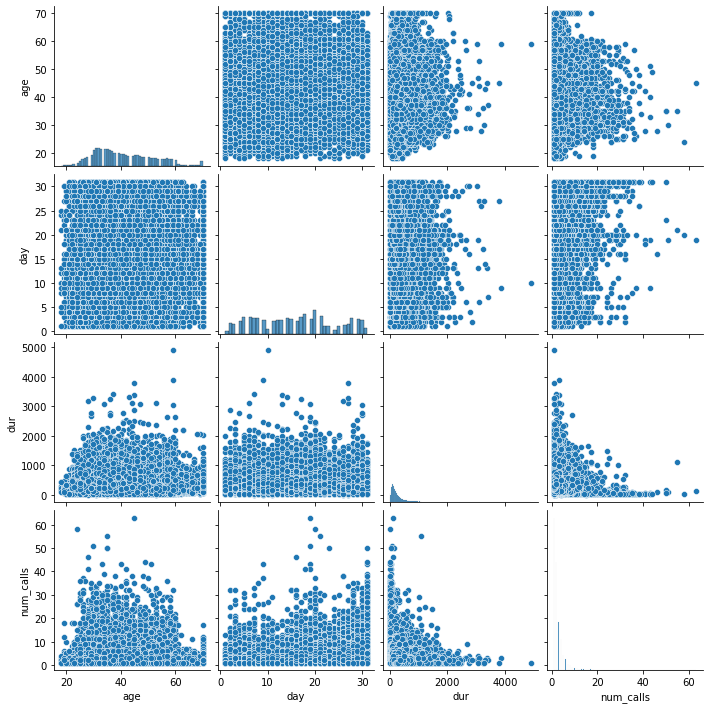

In [52]:
sns.pairplot(df_cont)

#### Distplot:
Helps us to check the distribution of the feature columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

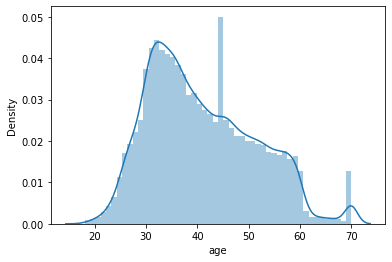

In [53]:
sns.distplot(df['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

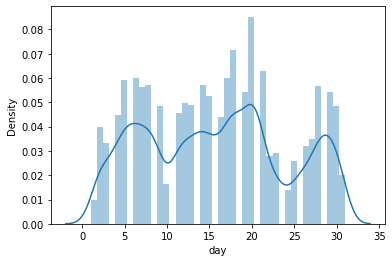

In [54]:
sns.distplot(df['day'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dur', ylabel='Density'>

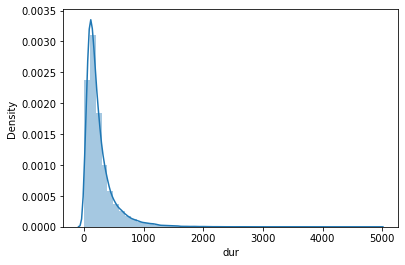

In [55]:
sns.distplot(df['dur'])

In [56]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

#### Count Plot:
Show the counts of observations in each categorical bin using bars.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

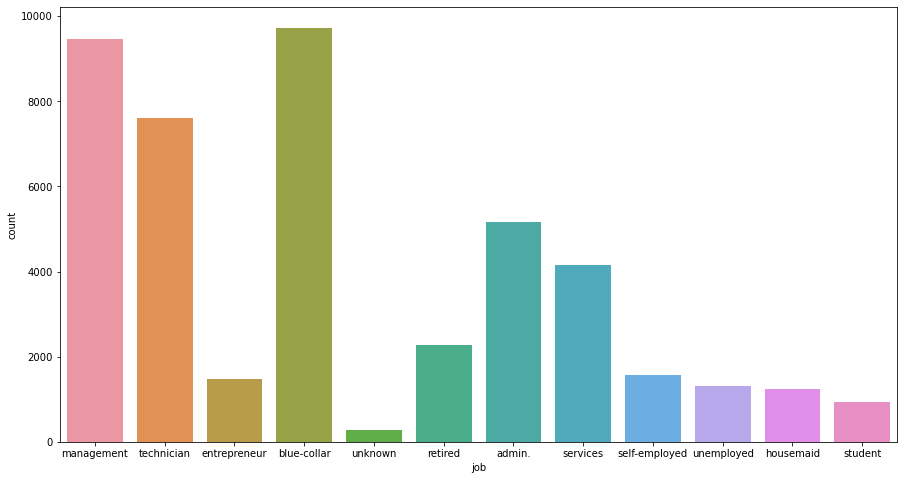

In [57]:
plt.figure(figsize =(15,8))
sns.countplot("job", data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

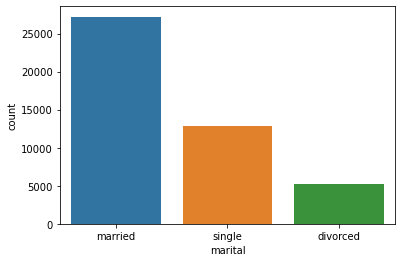

In [58]:
sns.countplot("marital", data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_qual', ylabel='count'>

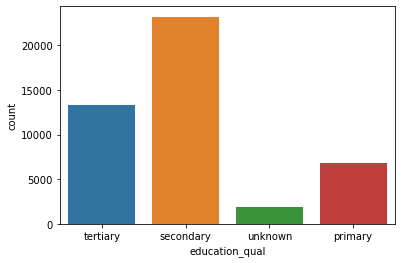

In [59]:
sns.countplot("education_qual", data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='call_type', ylabel='count'>

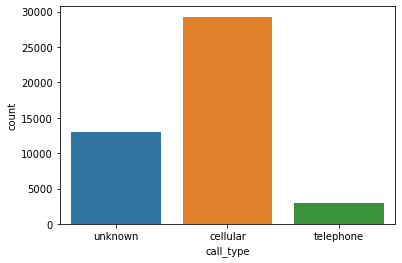

In [60]:
sns.countplot("call_type", data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mon', ylabel='count'>

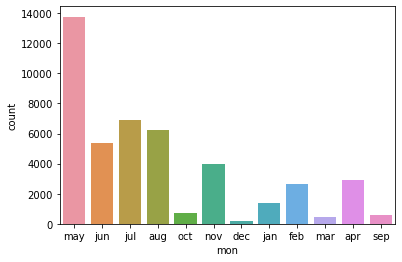

In [61]:
sns.countplot("mon", data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prev_outcome', ylabel='count'>

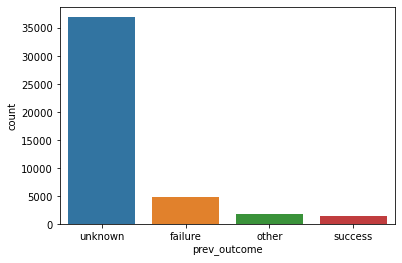

In [62]:
sns.countplot("prev_outcome", data = df)

In [63]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

#### Bar Plot:
* Do the same thing as count plot. 
* Here we must give both x and y values.
* Either of X or Y value must be continuous.
* Not both X and Y values can be categorical.
* Both X and Y values can be continuous.

<AxesSubplot:xlabel='age', ylabel='job'>

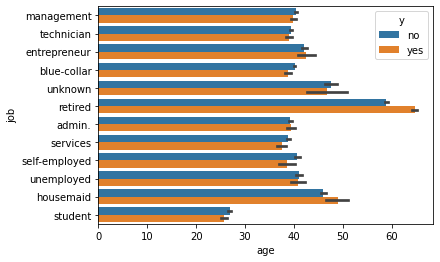

In [64]:
sns.barplot(x = 'age', y = 'job', data = df, hue = 'y')

<AxesSubplot:xlabel='age', ylabel='marital'>

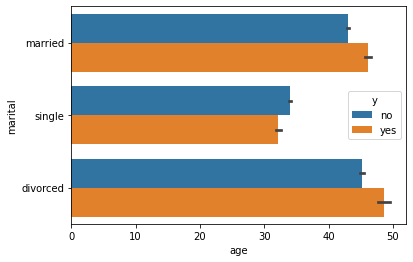

In [65]:
sns.barplot(x = 'age', y = 'marital', data = df, hue = 'y')

<AxesSubplot:xlabel='age', ylabel='education_qual'>

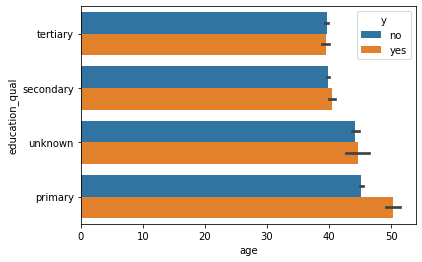

In [66]:
sns.barplot(x = 'age', y = 'education_qual', data = df, hue = 'y')

<AxesSubplot:xlabel='age', ylabel='call_type'>

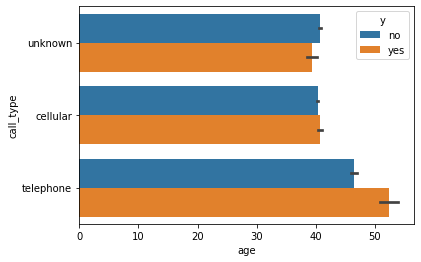

In [67]:
sns.barplot(x = 'age', y = 'call_type', data = df, hue = 'y')

<AxesSubplot:xlabel='age', ylabel='mon'>

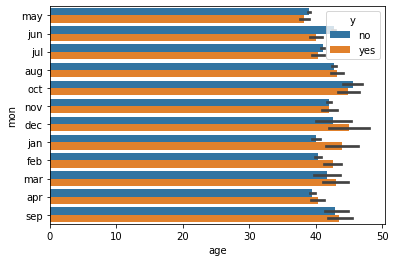

In [68]:
sns.barplot(x = 'age', y = 'mon', data = df, hue = 'y')

<AxesSubplot:xlabel='age', ylabel='prev_outcome'>

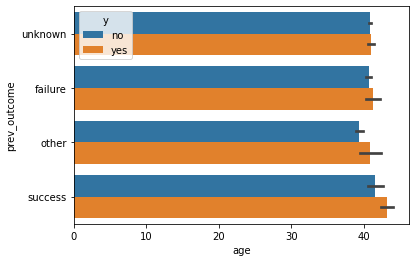

In [69]:
sns.barplot(x = 'age', y = 'prev_outcome', data = df, hue = 'y')

<AxesSubplot:xlabel='age', ylabel='day'>

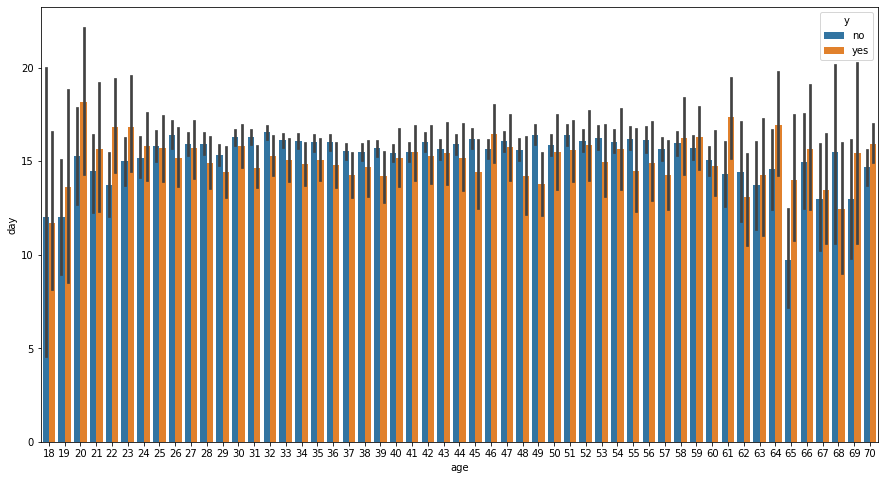

In [70]:
plt.figure(figsize =(15,8))
sns.barplot(x = 'age', y = 'day', data = df, hue = 'y')

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object

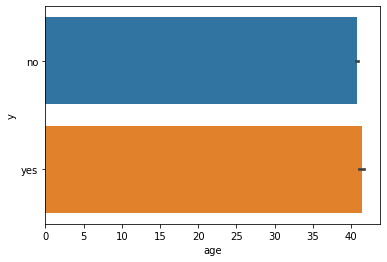

In [71]:
sns.barplot(x = 'age', y = 'y', data = df)
plt.show()

In [72]:
df['target'] = df.y.copy()
df.target = df.target.map({'yes':1, 'no':0})
df.head()

<ipython-input-72-0bb0aed5ca1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df.y.copy()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


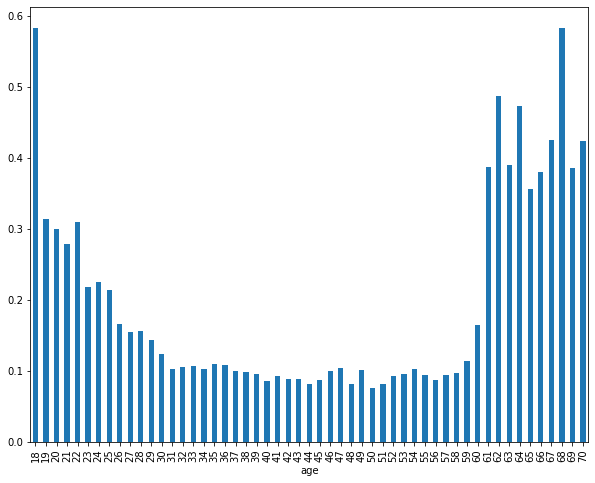

In [73]:
plt.figure(figsize =(10,8))
df.groupby('age')['target'].mean().plot(kind = 'bar')
plt.show()

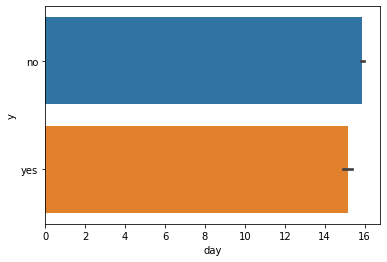

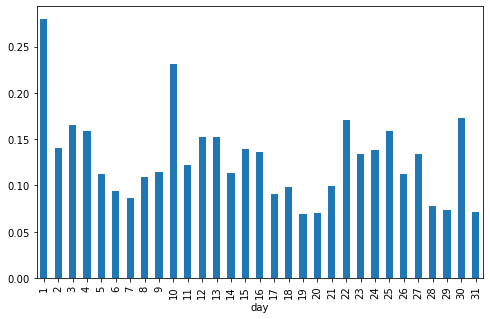

In [74]:
sns.barplot(x = 'day', y = 'y', data = df)
plt.figure(figsize =(8,5))
df.groupby('day')['target'].mean().plot(kind = 'bar')
plt.show()

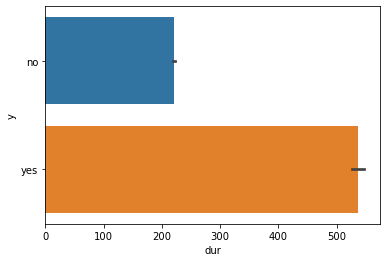

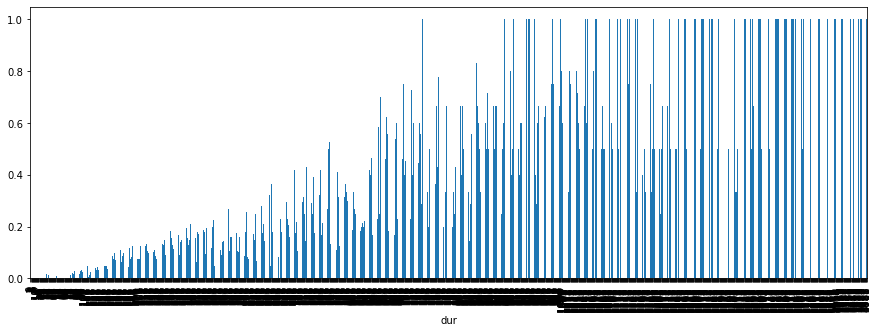

In [75]:
sns.barplot(x = 'dur', y = 'y', data = df)
plt.figure(figsize =(15,5))
df.groupby('dur')['target'].mean().plot(kind = 'bar')
plt.show()

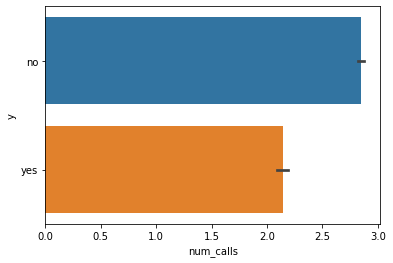

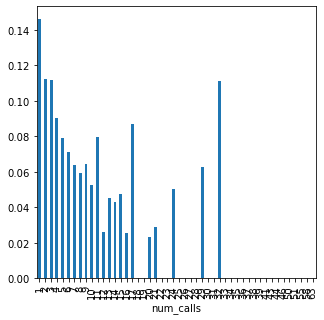

In [76]:
sns.barplot(x = 'num_calls', y = 'y', data = df)
plt.figure(figsize =(5,5))
df.groupby('num_calls')['target'].mean().plot(kind = 'bar')
plt.show()

In [77]:
# plt.pie('education_qual', data = df)
# plt.show()

In [78]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
target             int64
dtype: object

In [79]:
# # create data
# x = df.target
# y1 = df.job.values
# y1 = df.marital.values
# y2 = df.education_qual.values
# y3 = df.call_type.values
# y4 = df.mon.values
# y5 = df.prev_outcome.values
# df.y.shape
# y1.shape
# x.shape
# type(x)
# # plot bars in stack manner
# plt.bar(x, y1, color='r')
# plt.bar(x, y2, bottom=y1, color='b')
# plt.bar(x, y3, bottom=y1+y2, color='y')
# plt.bar(x, y4, bottom=y1+y2+y3, color='m')
# plt.bar(x, y5, bottom=y1+y2+y3+y4, color='c')
# plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color='pink')
# plt.xlabel("Teams")
# plt.ylabel("Score")
# plt.legend(["job", marital", "education_qual", "call_type", "mon", "prev_outcome"])
# plt.show()

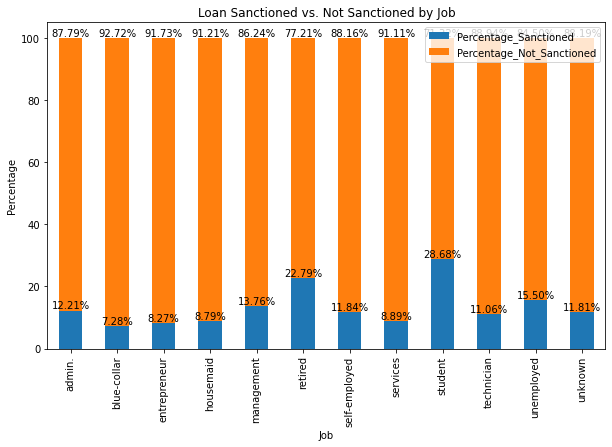

In [80]:
# Grouping data by the "job" column and calculating the count of "loan sanctioned" and "loan not sanctioned" cases
grouped_data = df.groupby('job')['y'].value_counts().unstack().fillna(0)

# Calculate the percentage of "loan sanctioned" and "loan not sanctioned" cases within each group
grouped_data['Total'] = grouped_data['yes'] + grouped_data['no']
grouped_data['Percentage_Sanctioned'] = (grouped_data['yes'] / grouped_data['Total']) * 100
grouped_data['Percentage_Not_Sanctioned'] = (grouped_data['no'] / grouped_data['Total']) * 100

# Plotting the stacked bar chart
ax = grouped_data[['Percentage_Sanctioned', 'Percentage_Not_Sanctioned']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Sanctioned vs. Not Sanctioned by Job')
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
# plt.show()
# Displaying percentages on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height), ha='center', va='bottom')
plt.show()

In [81]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

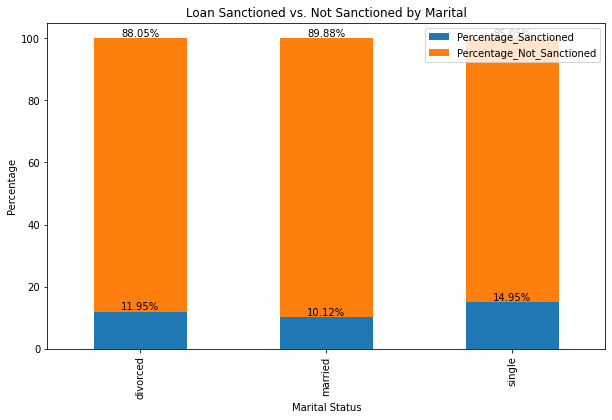

In [82]:
grouped_data = df.groupby('marital')['y'].value_counts().unstack().fillna(0)
grouped_data['Total'] = grouped_data['yes'] + grouped_data['no']
grouped_data['Percentage_Sanctioned'] = (grouped_data['yes'] / grouped_data['Total']) * 100
grouped_data['Percentage_Not_Sanctioned'] = (grouped_data['no'] / grouped_data['Total']) * 100
ax = grouped_data[['Percentage_Sanctioned', 'Percentage_Not_Sanctioned']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Sanctioned vs. Not Sanctioned by Marital')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
# plt.show()
# Displaying percentages on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height), ha='center', va='bottom')
plt.show()

In [83]:
df.job.isnull().sum()

0

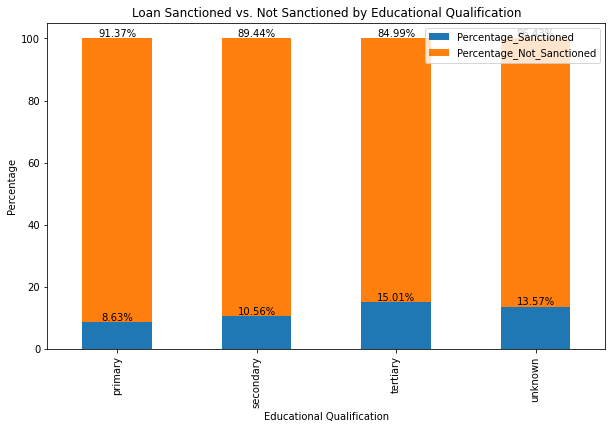

In [84]:
grouped_data = df.groupby('education_qual')['y'].value_counts().unstack().fillna(0)
grouped_data['Total'] = grouped_data['yes'] + grouped_data['no']
grouped_data['Percentage_Sanctioned'] = (grouped_data['yes'] / grouped_data['Total']) * 100
grouped_data['Percentage_Not_Sanctioned'] = (grouped_data['no'] / grouped_data['Total']) * 100
ax = grouped_data[['Percentage_Sanctioned', 'Percentage_Not_Sanctioned']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Sanctioned vs. Not Sanctioned by Educational Qualification')
plt.xlabel('Educational Qualification')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height), ha='center', va='bottom')
plt.show()

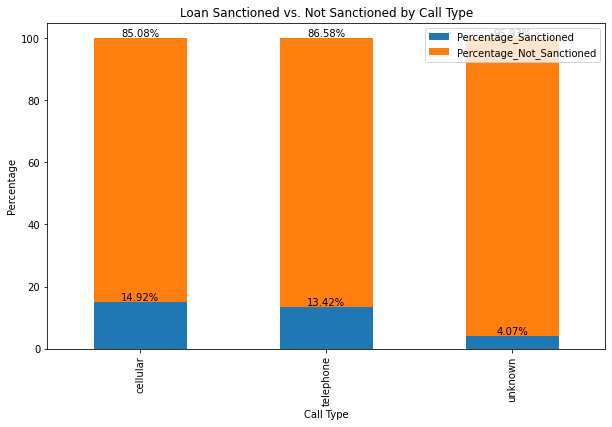

In [85]:
grouped_data = df.groupby('call_type')['y'].value_counts().unstack().fillna(0)
grouped_data['Total'] = grouped_data['yes'] + grouped_data['no']
grouped_data['Percentage_Sanctioned'] = (grouped_data['yes'] / grouped_data['Total']) * 100
grouped_data['Percentage_Not_Sanctioned'] = (grouped_data['no'] / grouped_data['Total']) * 100
ax = grouped_data[['Percentage_Sanctioned', 'Percentage_Not_Sanctioned']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Sanctioned vs. Not Sanctioned by Call Type')
plt.xlabel('Call Type')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height), ha='center', va='bottom')
plt.show()

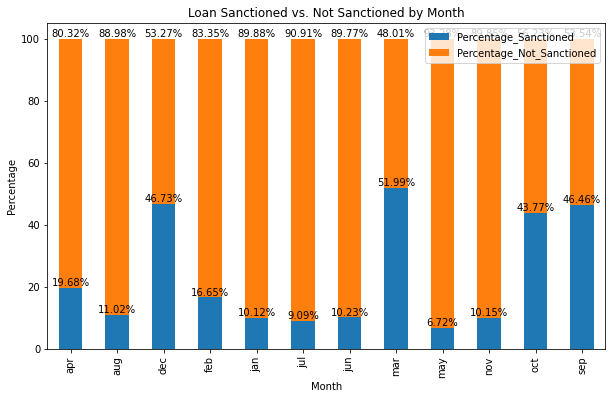

In [86]:
grouped_data = df.groupby('mon')['y'].value_counts().unstack().fillna(0)
grouped_data['Total'] = grouped_data['yes'] + grouped_data['no']
grouped_data['Percentage_Sanctioned'] = (grouped_data['yes'] / grouped_data['Total']) * 100
grouped_data['Percentage_Not_Sanctioned'] = (grouped_data['no'] / grouped_data['Total']) * 100
ax = grouped_data[['Percentage_Sanctioned', 'Percentage_Not_Sanctioned']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Sanctioned vs. Not Sanctioned by Month')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height), ha='center', va='bottom')
plt.show()

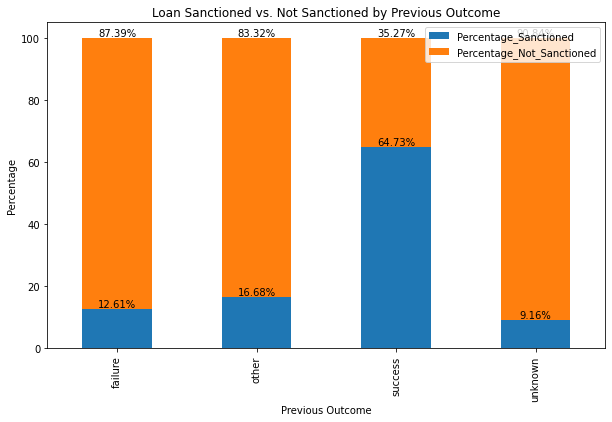

In [87]:
grouped_data = df.groupby('prev_outcome')['y'].value_counts().unstack().fillna(0)
grouped_data['Total'] = grouped_data['yes'] + grouped_data['no']
grouped_data['Percentage_Sanctioned'] = (grouped_data['yes'] / grouped_data['Total']) * 100
grouped_data['Percentage_Not_Sanctioned'] = (grouped_data['no'] / grouped_data['Total']) * 100
ax = grouped_data[['Percentage_Sanctioned', 'Percentage_Not_Sanctioned']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Sanctioned vs. Not Sanctioned by Previous Outcome')
plt.xlabel('Previous Outcome')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height), ha='center', va='bottom')
plt.show()

In [88]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

## Encode

In [89]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,70,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,70,retired,married,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [90]:
df.job.value_counts(), df.marital.value_counts(), df.education_qual.value_counts(), df.call_type.value_counts(), df.mon.value_counts(), df.prev_outcome.value_counts()

(blue-collar      9730
 management       9457
 technician       7596
 admin.           5170
 services         4153
 retired          2264
 self-employed    1579
 entrepreneur     1487
 unemployed       1303
 housemaid        1240
 student           938
 unknown           288
 Name: job, dtype: int64,
 married     27210
 single      12788
 divorced     5207
 Name: marital, dtype: int64,
 secondary    23199
 tertiary     13299
 primary       6850
 unknown       1857
 Name: education_qual, dtype: int64,
 cellular     29282
 unknown      13017
 telephone     2906
 Name: call_type, dtype: int64,
 may    13765
 jul     6894
 aug     6245
 jun     5339
 nov     3970
 apr     2932
 feb     2649
 jan     1403
 oct      738
 sep      579
 mar      477
 dec      214
 Name: mon, dtype: int64,
 unknown    36953
 failure     4901
 other       1840
 success     1511
 Name: prev_outcome, dtype: int64)

In [91]:
df.job.isnull().sum()

0

## Encode

In [92]:
df.job = df.job.map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4, 'unknown':5, 'self-employed':6, 'admin.':7, 'management':8, 'unemployed':9, 'retired':10, 'student':11})
df.marital = df.marital.map({'married':0, 'divorced':1, 'single':2})
df.education_qual = df.education_qual.map({'primary':0,'secondary':1, 'unknown':2, 'tertiary':3})
df.call_type = df.call_type.map({'unknown':0, 'telephone':1, 'cellular':2})
df.mon = df.mon.map({'may':0, 'jul':1, 'jan':2, 'nov':3, 'jun':4, 'aug':5, 'feb':6, 'apr':7, 'oct':8, 'sep':9, 'dec':10, 'mar':11})
df.prev_outcome = df.prev_outcome.map({'unknown':0, 'failure':1, 'other':2, 'success':3})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [93]:
df.job.value_counts()

0     9730
8     9457
4     7596
7     5170
3     4153
10    2264
6     1579
1     1487
9     1303
2     1240
11     938
5      288
Name: job, dtype: int64

In [94]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

In [95]:
del df['y']

In [96]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
target            0
dtype: int64

## Split

In [97]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

## Balance data using SMOTEENN

In [98]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [99]:
import imblearn

In [100]:
from imblearn.combine import SMOTEENN
from collections import Counter

before_count = Counter(y_train)
print(before_count)
smt = SMOTEENN(sampling_strategy = 'all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)
after_count = Counter(y_smt)
print(after_count)

Counter({0: 31949, 1: 4215})
Counter({1: 30537, 0: 23449})


In [101]:
y_smt.value_counts(1)

1    0.565647
0    0.434353
Name: target, dtype: float64

In [102]:
y_train.value_counts()

0    31949
1     4215
Name: target, dtype: int64

In [103]:
y_train.value_counts(1)

0    0.883448
1    0.116552
Name: target, dtype: float64

## Scaling

In [104]:
from sklearn.preprocessing import StandardScaler   # standar sclaing
scaler = StandardScaler()   # initialize to a variable
scaler.fit(X_smt)  #  we are finding the values of mean and SD from the training data.
X_train_scaled = scaler.transform(X_smt)  # fit (mean,sd) and then transform the training data.
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(X_train_scaled,y_smt)
lr.score(X_train_scaled,y_smt)

0.8814692698106916

In [106]:
lr.coef_

array([[-0.145436  ,  0.57407152, -0.03895706, -0.11496966,  0.38635572,
        -0.05253511,  1.101003  ,  4.14332473, -1.00113917,  0.62378612]])

In [107]:
y_pred = lr.predict(X_test_scaled)

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print(lr.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred))
f1_score(y_test, y_pred)

0.7480367216015927
[[5794 2173]
 [ 105  969]]


0.4596774193548387

In [109]:
X_smt.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome'],
      dtype='object')

## K-NN

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

for k in [1,2,3,4,5,6,7,8,9,10,12,13, 14, 15,16,17, 18, 19, 20,25,30,50]:
  knn = KNeighborsClassifier(k)
  knn.fit(X_train_scaled, y_smt)
  train_score = knn.score(X_train_scaled, y_smt)
  knn = KNeighborsClassifier(k)
  cross_val_result = np.mean(cross_val_score(knn, X_train_scaled, y_smt, cv = 10))
  print(f'K : {k}, training score : {train_score} and cross-val score : {cross_val_result}')


KNeighborsClassifier()

K : 1, training score : 1.0 and cross-val score : 0.9441895467173431
K : 2, training score : 0.9827918349201645 and cross-val score : 0.9331312469114359
K : 3, training score : 0.9692142407290779 and cross-val score : 0.938817828229824
K : 4, training score : 0.9637128144333716 and cross-val score : 0.9336869465418409
K : 5, training score : 0.9567850924313711 and cross-val score : 0.9342239149167979
K : 6, training score : 0.9534879413181195 and cross-val score : 0.9312973509770618
K : 7, training score : 0.9494128107287074 and cross-val score : 0.9310934757242725
K : 8, training score : 0.9463379394657875 and cross-val score : 0.9284076902526307
K : 9, training score : 0.9435594413366428 and cross-val score : 0.9284445900366739
K : 10, training score : 0.9419479124217389 and cross-val score : 0.926740519304928
K : 12, training score : 0.9385581447041825 and cross-val score : 0.9250919766748347
K : 13, training score : 0.9370948023561664 and cross-val score : 0.9255364519701306
K : 14

KNeighborsClassifier()

In [111]:
knn = KNeighborsClassifier(1)
knn.fit(X_train_scaled, y_smt)
f'Test data accuracy is : {knn.score(X_test_scaled, y_test)}, {f1_score(y_test, knn.predict(X_test_scaled))} '

'Test data accuracy is : 0.8260148213693176, 0.5149552883132902 '

## Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,15,20,30]:
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(X_train_scaled, y_smt)
  train_score = dt.score(X_train_scaled, y_smt)
  dt = DecisionTreeClassifier(max_depth = depth)
  cross_val_result = np.mean(cross_val_score(dt, X_train_scaled, y_smt, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.7856296076760642 and cross-val score : 0.7855002171645278
Depth : 2, training score : 0.8041158818953061 and cross-val score : 0.8040790697109458
Depth : 3, training score : 0.8579631756381284 and cross-val score : 0.8572037581095288
Depth : 4, training score : 0.8658726336457601 and cross-val score : 0.8654651784966149
Depth : 5, training score : 0.8815989330567184 and cross-val score : 0.8798022646461845
Depth : 6, training score : 0.8901011373319009 and cross-val score : 0.8863780950748978
Depth : 7, training score : 0.8979365020560887 and cross-val score : 0.8954915559747489
Depth : 8, training score : 0.9162190197458601 and cross-val score : 0.9094581413914355
Depth : 9, training score : 0.928055421776016 and cross-val score : 0.9188309610393318
Depth : 10, training score : 0.9376319786611343 and cross-val score : 0.9239620142903799
Depth : 15, training score : 0.9777905382877042 and cross-val score : 0.9411701808844297
Depth : 20, training score : 0.

In [113]:
dt = DecisionTreeClassifier(max_depth = 30)
dt.fit(X_train_scaled, y_smt)
f'Test data accuracy is : {dt.score(X_test_scaled, y_test)}, {f1_score(y_test, dt.predict(X_test_scaled))} '

'Test data accuracy is : 0.8215905320207941, 0.5086810843740481 '

In [114]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators = [('logistic_regression', lr),('k-nn', knn),('decision-tree', dt)])
model.fit(X_train_scaled, y_smt)
f'Test data accuracy is : {model.score(X_test_scaled, y_test)}, {f1_score(y_test, model.predict(X_test_scaled))} '

'Test data accuracy is : 0.8192677801128194, 0.5299194476409667 '

In [115]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,12,15,20]:
  rf = RandomForestClassifier(max_depth = depth)
  rf.fit(X_train_scaled, y_smt)
  train_score = rf.score(X_train_scaled, y_smt)
  cross_val_result = np.mean(cross_val_score(rf, X_train_scaled, y_smt, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.796002667358204 and cross-val score : 0.8088385654006295
Depth : 2, training score : 0.8621494461527063 and cross-val score : 0.8539809425002269
Depth : 3, training score : 0.8804134405216167 and cross-val score : 0.8743565029710261
Depth : 4, training score : 0.8911940132626978 and cross-val score : 0.8868410511435674
Depth : 5, training score : 0.8941762679213129 and cross-val score : 0.8956213331397187
Depth : 6, training score : 0.9099581372948542 and cross-val score : 0.906475730242746
Depth : 7, training score : 0.9176823620938762 and cross-val score : 0.9141444997464643
Depth : 8, training score : 0.9287778312895936 and cross-val score : 0.9205906765356147
Depth : 9, training score : 0.9361686363131182 and cross-val score : 0.9287593773797942
Depth : 10, training score : 0.9455229133479051 and cross-val score : 0.936613239411934
Depth : 12, training score : 0.9610825028711147 and cross-val score : 0.9478939089690493
Depth : 15, training score : 0.98

In [124]:
rf = RandomForestClassifier(max_depth = 20)
rf.fit(X_train_scaled, y_smt)
f'Test data accuracy is : {rf.score(X_test_scaled, y_test)}, {f1_score(y_test, rf.predict(X_test_scaled))} '

'Test data accuracy is : 0.8311027541201195, 0.5528550512445095 '

In [117]:
list(zip(X.columns, rf.feature_importances_))

[('age', 0.013466567338068407),
 ('job', 0.03373780011961796),
 ('marital', 0.00046484696436105107),
 ('education_qual', 0.00627141706672067),
 ('call_type', 0.09299141181241687),
 ('day', 0.01755492476173868),
 ('mon', 0.12087436258978115),
 ('dur', 0.6266009585388748),
 ('num_calls', 0.053599173935653804),
 ('prev_outcome', 0.0344385368727666)]

In [118]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [119]:
import xgboost as xgb

for lr in [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.5, 1]:
  xg = xgb.XGBClassifier(learning_rate=lr)
  xg.fit(X_train_scaled, y_smt)
  train_score = xg.score(X_train_scaled, y_smt)
  cross_val_result = np.mean(cross_val_score(xg, X_train_scaled, y_smt, cv = 10))
  print(f'Learning Rate : {lr}, training score : {train_score} and cross-val score : {cross_val_result}')

Learning Rate : 0.001, training score : 0.9021783425332494 and cross-val score : 0.8938799131286987
Learning Rate : 0.002, training score : 0.9024191457044419 and cross-val score : 0.8996778182887738
Learning Rate : 0.005, training score : 0.9051050272292817 and cross-val score : 0.9034009632648479
Learning Rate : 0.01, training score : 0.9140888378468491 and cross-val score : 0.9107177265341015
Learning Rate : 0.02, training score : 0.9239988145074649 and cross-val score : 0.9199607758795505
Learning Rate : 0.03, training score : 0.9303708368836365 and cross-val score : 0.9265365617018672
Learning Rate : 0.04, training score : 0.9370392323935836 and cross-val score : 0.9324455848279507
Learning Rate : 0.05, training score : 0.9426888452561776 and cross-val score : 0.9376876839885201
Learning Rate : 0.06, training score : 0.9458933797651243 and cross-val score : 0.9416146493172031
Learning Rate : 0.07, training score : 0.9516541325528841 and cross-val score : 0.9446895501142919
Learnin

In [122]:
xg = xgb.XGBClassifier(learning_rate=1)
xg.fit(X_train_scaled, y_smt)
f'Test data accuracy is : {xg.score(X_test_scaled, y_test)}, {f1_score(y_test, xg.predict(X_test_scaled))} '

'Test data accuracy is : 0.8458135162039597, 0.5621859296482412 '

In [123]:
list(zip(X.columns, xg.feature_importances_))

[('age', 0.030869257),
 ('job', 0.04444692),
 ('marital', 0.033535358),
 ('education_qual', 0.047164377),
 ('call_type', 0.31543422),
 ('day', 0.04314623),
 ('mon', 0.15629452),
 ('dur', 0.14170372),
 ('num_calls', 0.07620966),
 ('prev_outcome', 0.11119569)]